Normalized Training Data:
 [[-1.2247448   0.22360674]
 [-0.6123724  -0.44721362]
 [ 0.         -1.118034  ]
 [ 1.8371172  -1.118034  ]
 [ 0.6123724   0.8944271 ]
 [-0.6123724   1.5652474 ]]
Normalized Test Data:
 [[-1.5921682  -0.04472148]
 [-0.3674234  -0.7155418 ]
 [ 1.2247448   0.22360674]]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Predictions:
Input: [-1.5921682  -0.04472148], Predicted: 0.6429, Actual: 0
Input: [-0.3674234 -0.7155418], Predicted: 0.6093, Actual: 0
Input: [1.2247448  0.22360674], Predicted: 0.6085, Actual: 1
Comparison of Denormalized and Original Data: True True


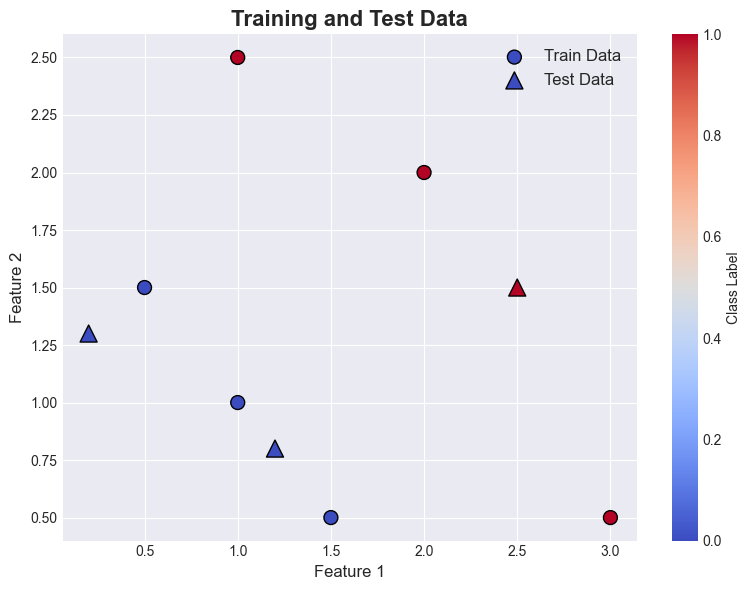

In [55]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Sample training data
X_train = np.array([[0.5, 1.5], [1, 1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_train = np.array([0, 0, 0, 1, 1, 1])

# Sample test data
X_test = np.array([[0.2, 1.3], [1.2, 0.8], [2.5, 1.5]])
y_test = np.array([0, 0, 1])

def build_model(input_dim):
    return tf.keras.Sequential([
        tf.keras.layers.Dense(5, activation='sigmoid', input_shape=(input_dim,)),
        tf.keras.layers.Dense(3, activation='sigmoid'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

def train_model(model, X, y, epochs=10, batch_size=32):
    model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.01),
                  loss = tf.keras.losses.BinaryCrossentropy(),
                  metrics=['accuracy'])
    model.fit(X, y, epochs=epochs, batch_size=batch_size, verbose=0)

def evaluate_model(model, X, y):
    predictions = model.predict(X)
    print("Predictions:")
    for x, pred, true in zip(X, predictions, y):
        print(f"Input: {x}, Predicted: {pred[0]:.4f}, Actual: {true}")

def plot_data(X_train, y_train, X_test, y_test):
    plt.style.use('seaborn-v0_8-darkgrid')
    fig, ax = plt.subplots(figsize=(8, 6))

    # Plot training data
    scatter_train = ax.scatter(X_train[:, 0], X_train[:, 1],
                               c=y_train, cmap='coolwarm', s=100,
                               edgecolors='k', marker='o', label='Train Data')

    # Plot test data
    scatter_test = ax.scatter(X_test[:, 0], X_test[:, 1],
                              c=y_test, cmap='coolwarm', s=150,
                              edgecolors='k', marker='^', label='Test Data')

    ax.set_title("Training and Test Data", fontsize=16, fontweight='bold')
    ax.set_xlabel("Feature 1", fontsize=12)
    ax.set_ylabel("Feature 2", fontsize=12)
    ax.legend(fontsize=12)
    plt.colorbar(scatter_train, ax=ax, label="Class Label")
    plt.tight_layout()
    plt.show()

def main():
     # Create and adapt the normalization layer on training data only
    norm_l = tf.keras.layers.Normalization(axis=-1)
    norm_l.adapt(X_train)

    # Normalize training and test data
    X_train_norm = norm_l(X_train)
    X_test_norm = norm_l(X_test)

    print("Normalized Training Data:\n", X_train_norm.numpy())
    print("Normalized Test Data:\n", X_test_norm.numpy())

    # Build, train, and evaluate the model
    model = build_model(input_dim=2)
    train_model(model, X_train_norm, y_train)
    evaluate_model(model, X_test_norm, y_test)
    # desnormalize the training data for plotting

    # Denormalize for plotting (optional)
    X_train_denorm = denormalize(X_train_norm, norm_l)
    X_test_denorm = denormalize(X_test_norm, norm_l)

    # compare the normalized and denormalized data
    print("Comparison of Denormalized and Original Data:", 
          np.allclose(X_train_denorm, X_train), 
          np.allclose(X_test_denorm, X_test))
    
    plot_data(X_train_denorm, y_train, X_test_denorm, y_test)

def denormalize(data, norm_layer):
    """Denormalize data using the normalization layer."""
    mean = norm_layer.mean.numpy()
    variance = norm_layer.variance.numpy()
    std = np.sqrt(variance)
    return data.numpy() * std + mean
    

if __name__ == "__main__":
    main()
